In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('loan.csv')

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_num=df.select_dtypes(include=[np.number])

In [ ]:
df_cat=df.select_dtypes(include='object')

In [ ]:

df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_cat.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
df_num.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
LoanAmount,22
Loan_Amount_Term,14
ApplicantIncome,0
CoapplicantIncome,0


In [ ]:
for col in ['Credit_History','LoanAmount','Loan_Amount_Term']:
  df_num[col].fillna(df_num[col].median(),inplace=True)

<ipython-input-15-92e97f4cacb1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num[col].fillna(df_num[col].median(),inplace=True)


In [ ]:
df_num.isnull().sum().sort_values(ascending=False)

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
df_cat.isnull().sum().sort_values(ascending=False)

,0
Self_Employed,32
Dependents,15
Gender,13
Married,3
Loan_ID,0
Education,0
Property_Area,0
Loan_Status,0


In [ ]:
for col in ['Gender','Married','Dependents','Self_Employed']:
  df_cat[col].fillna(df_cat[col].mode()[0],inplace=True)

<ipython-input-19-753a80c15ece>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[col].fillna(df_cat[col].mode()[0],inplace=True)


In [ ]:
df_cat.isnull().sum().sort_values(ascending=False)

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


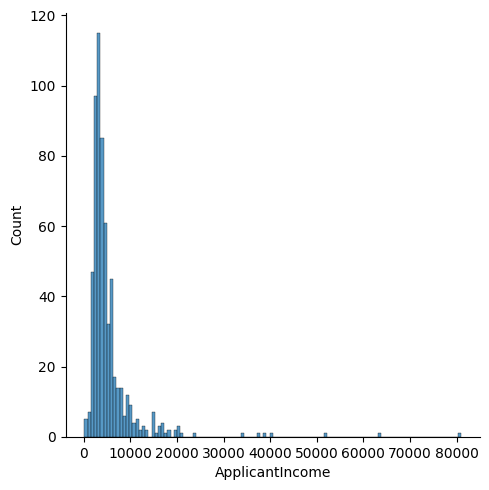

In [ ]:
sns.displot(df_num['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

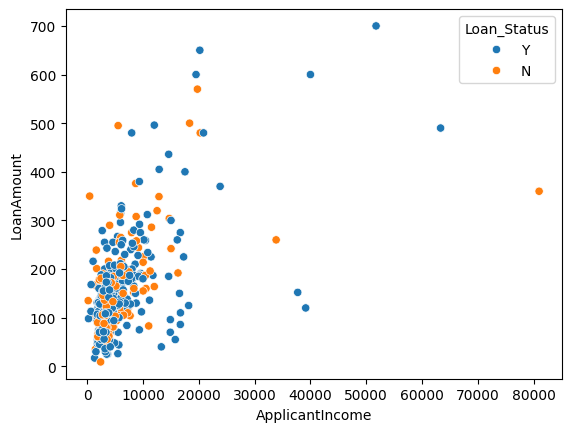

In [ ]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

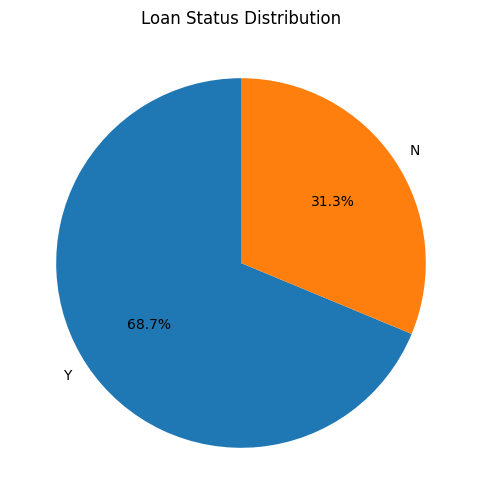

In [ ]:
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
loan_status_counts = df['Loan_Status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

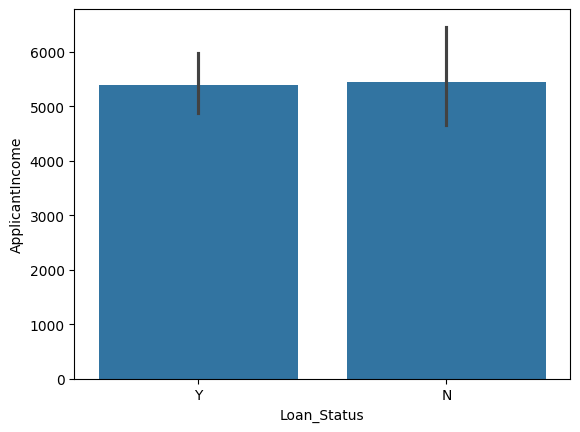

In [ ]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

In [ ]:
df_num_corr=df_num.corr()

In [ ]:
df_num_corr["LoanAmount"]

,LoanAmount
ApplicantIncome,0.565181
CoapplicantIncome,0.189218
LoanAmount,1.000000
Loan_Amount_Term,0.036960
Credit_History,-0.000607


In [ ]:
df_num_cols=[]
df_num_cols.extend(df_num_corr[(df_num_corr)>0.3].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr)<0.3].index.values)

In [ ]:
df_num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

annova

In [ ]:
from scipy.stats import f_oneway

In [ ]:
df_cat['la']=df_num['LoanAmount']

In [ ]:
groups=[df_cat['la'][df_cat["Loan_Status"]==category] for category in df_cat["Loan_Status"].unique()]
f_stat,p_value=f_oneway(*groups)
print(f"F-statistic:{f_stat},P-value:{p_value}")

F-statistic:0.6758961135626512,P-value:0.41132365467797827


In [ ]:
df_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status', 'la'],
      dtype='object')

In [ ]:
c_list=[]
nc_list=[]
for c1 in list(df_cat.columns):
  if c1=='la':
    continue
  else:
    groups=[df_cat['la'][df_cat[c1]==category] for category in df_cat[c1].unique()]
    f_stat,p_value=f_oneway(*groups)
    print(f"column:{c1},F-statistic:{f_stat},P-value:{p_value}")
    if p_value< 0.05:
      c_list.append(c1)
    else:
      nc_list.append(c1)

column:Loan_ID,F-statistic:nan,P-value:nan
column:Gender,F-statistic:7.075116356652259,P-value:0.008020939362347464
column:Married,F-statistic:13.431544231070268,P-value:0.00026890514935592715
column:Dependents,F-statistic:7.152520778096996,P-value:0.00010007190137744046
column:Education,F-statistic:17.940471961536034,P-value:2.629954538482716e-05
column:Self_Employed,F-statistic:8.216572106001653,P-value:0.004293677836508999
column:Property_Area,F-statistic:0.6832460574427932,P-value:0.5053605419203728
column:Loan_Status,F-statistic:0.6758961135626512,P-value:0.41132365467797827


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


In [ ]:
c_list

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

In [ ]:

nc_list

['Loan_ID', 'Property_Area', 'Loan_Status']

In [ ]:
df_cat1=df_cat[c_list]

In [ ]:
df_cat1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'], dtype='object')

In [ ]:
df_cat1.head()

,Gender,Married,Dependents,Education,Self_Employed
0,Male,No,0,Graduate,No
1,Male,Yes,1,Graduate,No
2,Male,Yes,0,Graduate,Yes
3,Male,Yes,0,Not Graduate,No
4,Male,No,0,Graduate,No


In [ ]:
#label encode
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df_cat1_e=df_cat1.apply(le.fit_transform)

In [ ]:
df_cat1_e.head()

,Gender,Married,Dependents,Education,Self_Employed
0,1,0,0,0,0
1,1,1,1,0,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,0,0,0,0


In [ ]:
df_cat1.shape

(614, 5)

for categorical

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
encoded_array = encoder.fit_transform(df_cat1)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df_cat1.columns))

In [ ]:
encoded_df.shape

(614, 12)

outlier IQR

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [ ]:
columns_to_check=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

df_no_outliers = remove_outliers_iqr(df_num, columns_to_check)

print("Original DataFrame:")
print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(614, 5)

DataFrame after Outlier Treatment:
(445, 5)


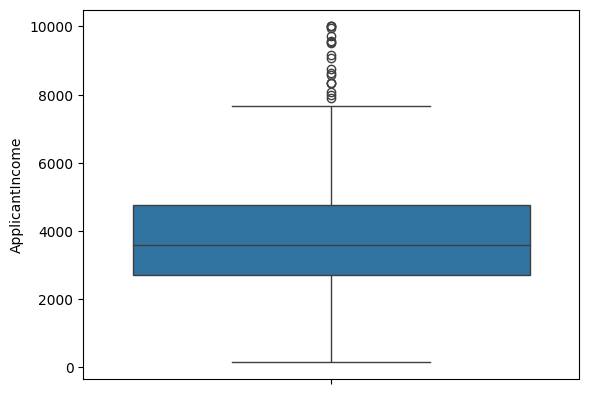

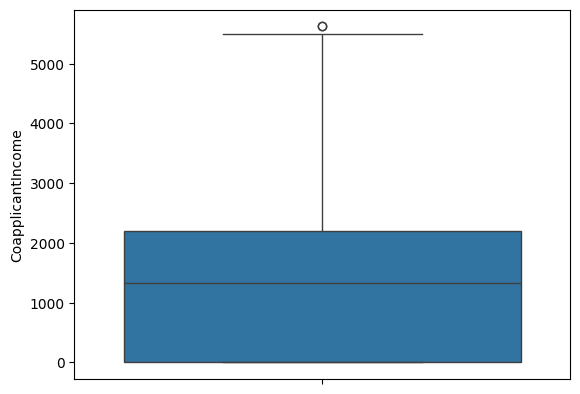

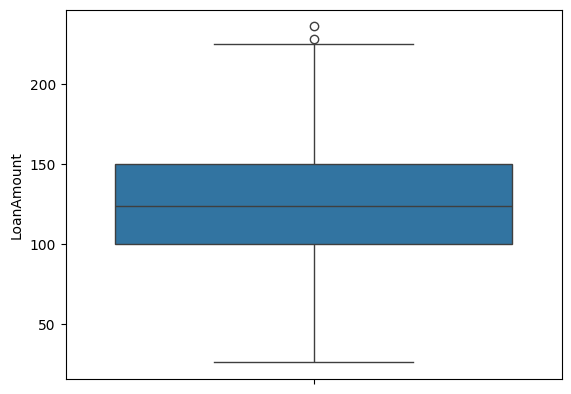

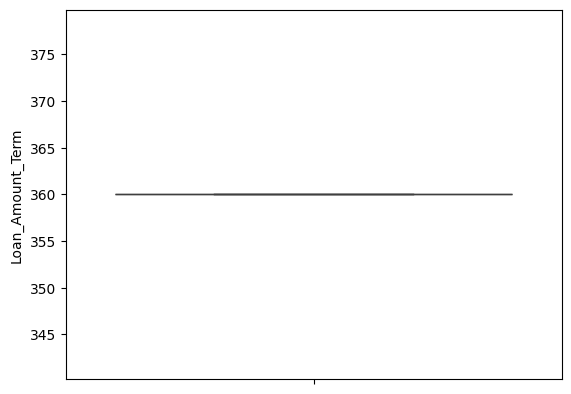

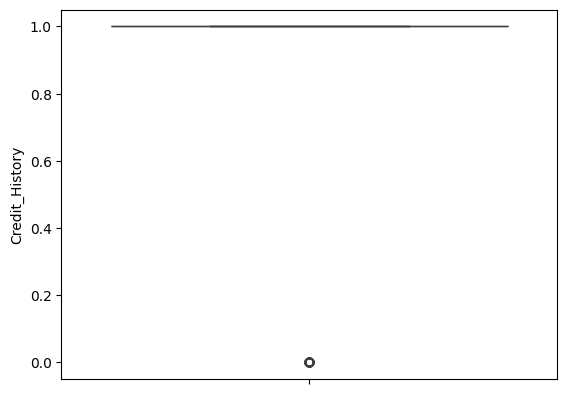

In [ ]:
#outliers showw
for i in df_no_outliers:
  sns.boxplot(df_no_outliers[i])
  plt.show()

In [ ]:

encoded_df.shape

(614, 12)

In [ ]:
df_no_outliers.shape

(445, 5)

In [ ]:
df_f_cat=encoded_df.loc[df_no_outliers.index,:]

min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = MinMaxScaler()

In [ ]:
minmax_scaler=MinMaxScaler()
df_minmax_scaled=df_no_outliers.copy()
df_minmax_scaled[columns_to_scale]=minmax_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [ ]:
df_minmax_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.578579,0.000000,0.485714,0.0,1.0
1,0.450051,0.268089,0.485714,0.0,1.0
2,0.289340,0.000000,0.190476,0.0,1.0
3,0.247005,0.419200,0.447619,0.0,1.0
4,0.593909,0.000000,0.547619,0.0,1.0


Linear regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

In [ ]:
X=df_minmax_scaled.drop('LoanAmount',axis=1)
y=df_minmax_scaled['LoanAmount']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

0.38934135522649616

In [ ]:
model.score(X_test,y_test)

0.3982921576995503

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
mse

0.02597693326013939

In [ ]:
r2

0.3982921576995503

In [ ]:
X_train

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
30,0.407716,0.598933,0.0,1.0
23,0.326396,0.340800,0.0,0.0
85,0.224975,0.449956,0.0,1.0
238,0.371777,0.000000,0.0,1.0
332,0.272386,0.000000,0.0,1.0
...,...,...,...,...
141,0.534721,0.000000,0.0,1.0
362,0.467005,0.414756,0.0,1.0
470,0.335025,0.369600,0.0,1.0
599,0.571574,0.000000,0.0,1.0


In [ ]:
y_train

,LoanAmount
30,0.833333
23,0.409524
85,0.523810
238,0.409524
332,0.214286
...,...
141,0.676190
362,0.495238
470,0.647619
599,0.790476


In [ ]:
X_test

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
386,0.222944,0.284444,0.0,1.0
486,0.344873,0.000000,0.0,0.0
157,0.953096,0.000000,0.0,1.0
565,0.438274,0.000000,0.0,1.0
89,0.562944,0.740800,0.0,1.0
...,...,...,...,...
607,0.389543,0.250844,0.0,1.0
601,0.278579,0.496356,0.0,1.0
496,0.248731,0.302222,0.0,1.0
71,0.175127,0.333333,0.0,1.0


In [ ]:
y_test

,LoanAmount
386,0.504762
486,0.257143
157,0.766667
565,0.447619
89,0.709524
...,...
607,0.623810
601,0.614286
496,0.385714
71,0.338095


Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.score(X_train,y_train)

0.8926646700723606

In [ ]:
rf.score(X_test,y_test)

0.3153815702779459

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
mse

0.02955634945617184

In [ ]:
r2

0.3153815702779459

Decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor=DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
regressor.score(X_train,y_train)

0.9923628942598768

In [ ]:
regressor.score(X_test,y_test)

-0.25182147743981176

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
mse

0.0540436415931333

In [ ]:
r2

-0.25182147743981176

Adaboosting regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

base_estimator = DecisionTreeRegressor(max_depth=4)
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

In [ ]:
adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, random_state=42)

In [ ]:
y_pred = adaboost_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

0.026521431165514666

In [ ]:
r2

0.38567986599831217

Gradientboostregressr

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gbr.score(X_train,y_train)

0.697931785059321

In [ ]:
y_pred=gbr.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
mse

0.028861443519895853

In [ ]:
r2

0.3314777871535539

Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

-1.4919755608744367e-07

Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred = ridge_reg.predict(X_test)

In [ ]:

r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.3894049097453379

Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [ ]:
ssres=np.sum((y_test-y_pred)**2)
sstot=np.sum((y_test-np.mean(y_test))**2)
r2=1-(ssres/sstot)

In [ ]:
ssres=np.sum((y_test-y_pred)**2)
sstotal=np.sum((y_test-np.mean(y_test))**2)
r2=1-ssres/sstotal

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [ ]:
r2

0.3894049097453379

In [ ]:
mae

0.12466790251596585

In [ ]:
mse

0.02636061356267666

In [ ]:
rmse

0.16235951947045377

#Gridsearchcv

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import for RandomForestRegressor
from sklearn.model_selection import GridSearchCV  # Import for GridSearchCV

# Ensure all categorical features are label encoded
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Now proceed with train-test split and model fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Print the best score
print("Best Score:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the mean squared error
print("Mean Squared Error:")
print(mean_squared_error(y_test, y_pred))

# Print the R-squared score
print("R-squared Score:")
print(r2_score(y_test, y_pred))

Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:
0.34801929067907034
Mean Squared Error:
0.023644809000878984
R-squared Score:
0.45231152334073466


unsupervised

K means clustering

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

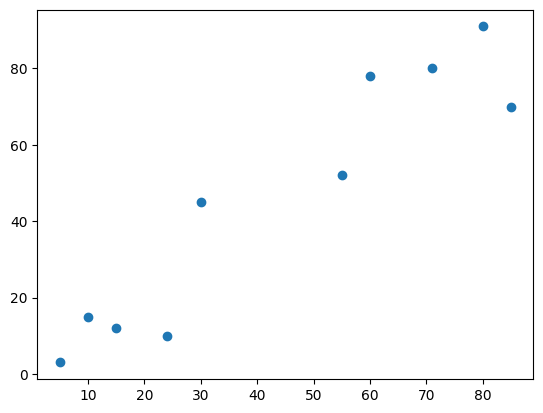

In [ ]:
plt.scatter(X[:,0],X[:,1], label='True Position')

kmeans clustering with 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
print(kmeans.cluster_centers_)

[[16.8 17. ]
 [70.2 74.2]]


In [ ]:
print(kmeans.labels_)

[0 0 0 0 0 1 1 1 1 1]


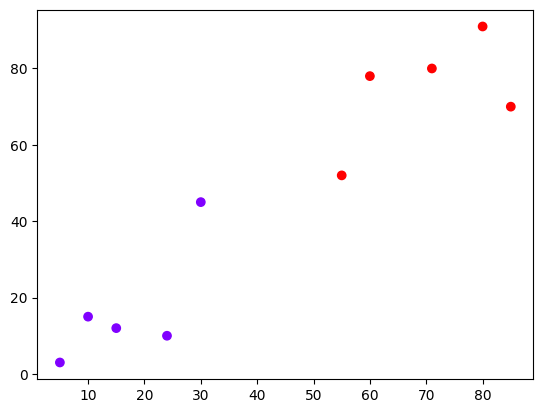

In [ ]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

kmeans clustering with 3 clusters

In [ ]:
kmeans_1 = KMeans(n_clusters=3)
kmeans_1.fit(X)

KMeans(n_clusters=3)

In [ ]:
print(kmeans_1.cluster_centers_)

[[74.   79.75]
 [13.5  10.  ]
 [42.5  48.5 ]]


In [ ]:
print(kmeans_1.labels_)

[1 1 1 1 2 0 0 0 2 0]


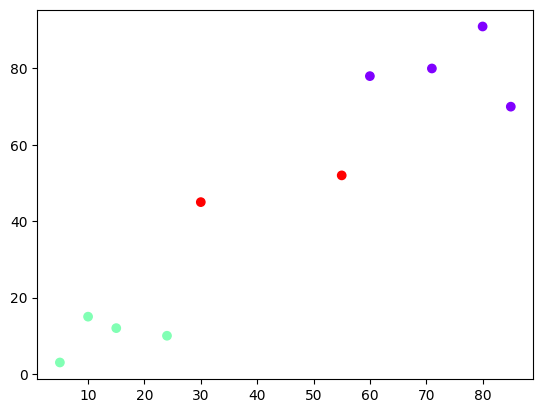

In [ ]:
plt.scatter(X[:,0],X[:,1], c=kmeans_1.labels_, cmap='rainbow')

Determining the number of clusters using elbow method

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_

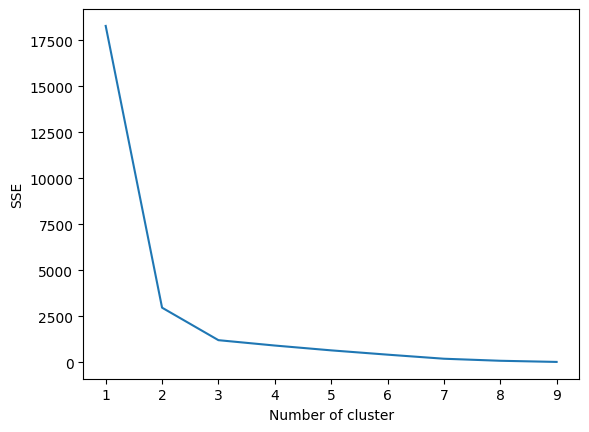

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()